In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [18]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

C:\anaconda 3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\anaconda 3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\anaconda 3\envs\myenv\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda 3\envs\myenv\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\anaconda 3\envs\myenv\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

number of estimated clusters : 3


In [19]:
supervised=pd.DataFrame(dataset)

In [20]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
supervised['Cluster_group']=ms

In [22]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,"MeanShift(bandwidth=27.161411938994306, bin_se..."
1,2,Male,21,15,81,"MeanShift(bandwidth=27.161411938994306, bin_se..."
2,3,Female,20,16,6,"MeanShift(bandwidth=27.161411938994306, bin_se..."
3,4,Female,23,16,77,"MeanShift(bandwidth=27.161411938994306, bin_se..."
4,5,Female,31,17,40,"MeanShift(bandwidth=27.161411938994306, bin_se..."
...,...,...,...,...,...,...
195,196,Female,35,120,79,"MeanShift(bandwidth=27.161411938994306, bin_se..."
196,197,Female,45,126,28,"MeanShift(bandwidth=27.161411938994306, bin_se..."
197,198,Male,32,126,74,"MeanShift(bandwidth=27.161411938994306, bin_se..."
198,199,Male,32,137,18,"MeanShift(bandwidth=27.161411938994306, bin_se..."


In [23]:
supervised.to_csv("cluster.csv",index=False)

In [24]:
centroids=ms.cluster_centers_

In [25]:
centroids

array([[54.95402299, 48.73563218],
       [81.88888889, 81.5       ],
       [82.2       , 19.37142857]])

In [26]:
ms

MeanShift(bandwidth=27.161411938994306, bin_seeding=True)

In [27]:
supervised.columns[3]

'Annual Income (k$)'

In [28]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

C:\anaconda 3\envs\myenv\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


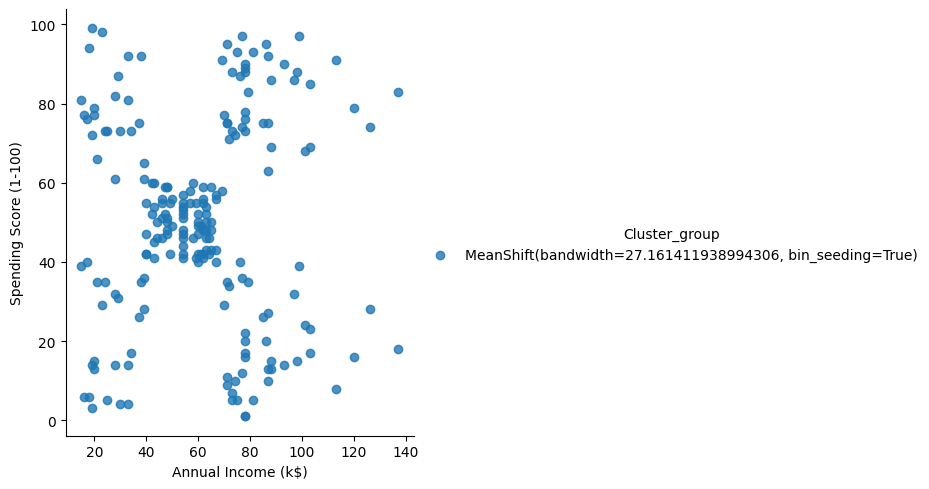

In [29]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)